# How does ocean temperature vary with location, depth, and time of year?

<img src="https://manoa.hawaii.edu/exploringourfluidearth/sites/default/files/styles/half-page-width/public/M1U2-SF%20Fig2-5%20Summer%20%26%20Winter%20Temp.png" width="400" class="center"/>

<img src="https://manoa.hawaii.edu/exploringourfluidearth/sites/default/files/styles/half-page-width/public/M1U2-SF%20Fig2-6%20Tropics%20Location.png" width="400" class="center"/>


#### https://manoa.hawaii.edu/exploringourfluidearth/physical/world-ocean/introduction-world-ocean

# Sea Temperature Image Service

In [5]:
from arcgis.features import SpatialDataFrame
from arcgis.raster import ImageryLayer
from arcgis.geometry import Geometry, Point
from arcgis.gis import GIS

gis = GIS()

In [6]:
img_svc ="https://sampleserver6.arcgisonline.com/arcgis/rest/services/ScientificData/SeaTemperature/ImageServer"
img_lyr = ImageryLayer(img_svc)

# Ocean Locations

In [7]:
lat_lon = [[-21.005859,-1.193764],[-44.912109,27.560226],[-28.388672,60.475268], [27.949219,73.28199]]

In [8]:
locations = []
for point in lat_lon:
    locations.append(Point(point))

In [9]:
locations

[{'x': -21.005859, 'y': -1.193764, 'spatialReference': {'wkid': 4326}},
 {'x': -44.912109, 'y': 27.560226, 'spatialReference': {'wkid': 4326}},
 {'x': -28.388672, 'y': 60.475268, 'spatialReference': {'wkid': 4326}},
 {'x': 27.949219, 'y': 73.28199, 'spatialReference': {'wkid': 4326}}]

# Defining a symbology for the features when I draw them on the map

In [10]:
symbol = {"color":[0,0,128,128],
                    "size":18,
                    "angle":0,
                    "xoffset":0,
                    "yoffset":0,
                    "type":"esriSMS",
                    "style":
                    "esriSMSCircle",
                    "outline":
                        {"color":[0,0,128,255],
                         "width":1,
                         "type":"esriSLS",
                         "style":"esriSLSSolid"}
}

In [11]:
world_map = gis.map()
world_map.basemap = 'oceans'
world_map

MapView(layout=Layout(height='400px', width='100%'))

In [12]:
world_map.add_layer(img_lyr)
for l in locations:
    world_map.draw(l, symbol=symbol)

# What does the map look like at different depths?

# Depth = 4

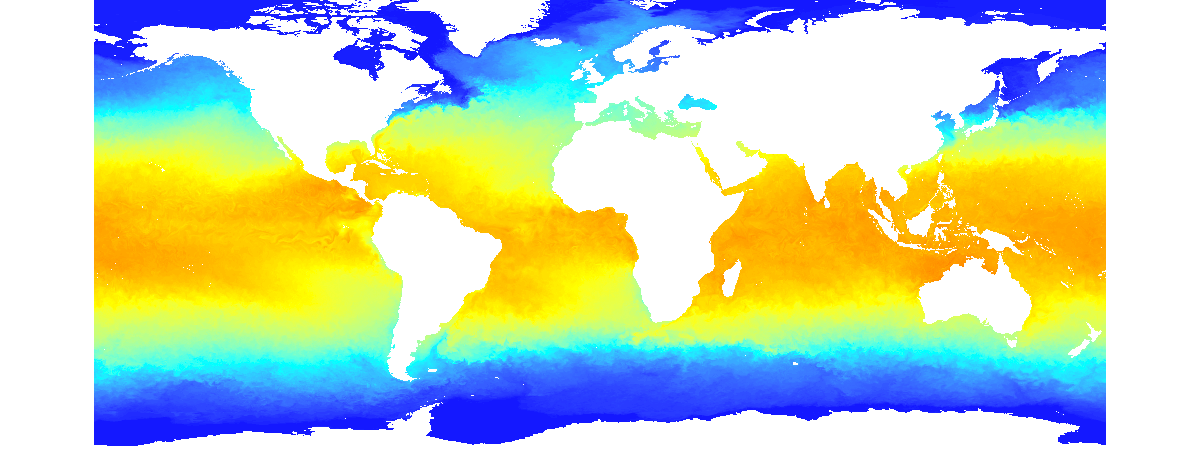

In [10]:
selected_4 = img_lyr.filter_by(where="StdZ = -4")
selected_4

## Depth = 150

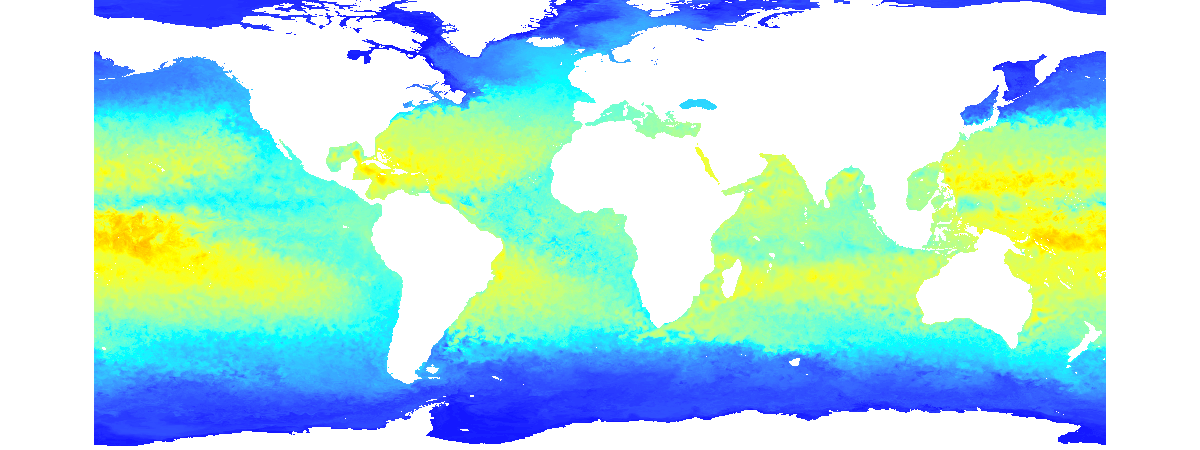

In [11]:
selected_150 = img_lyr.filter_by(where="StdZ = -150")#, geometry=the_geom)
selected_150

## Depth = 1250

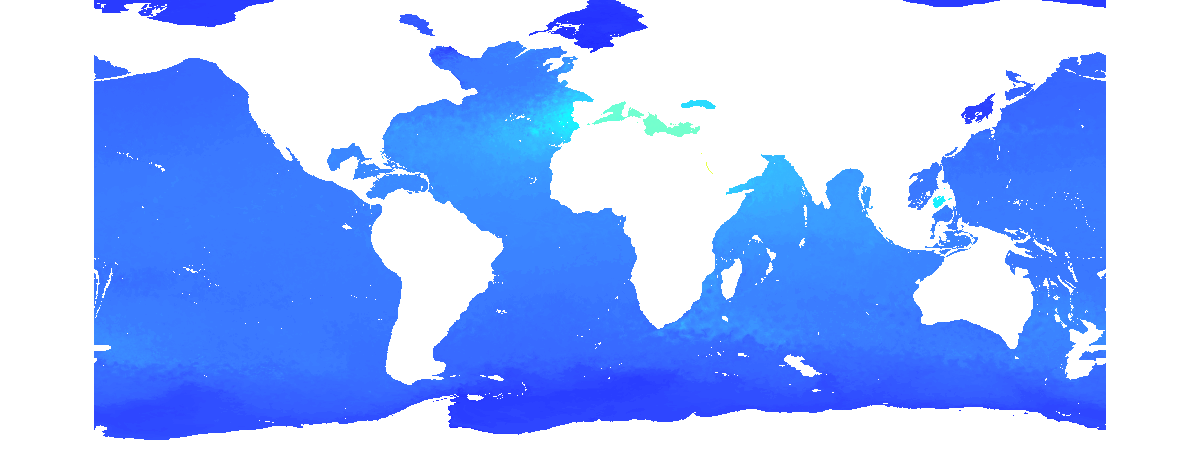

In [12]:
selected_1250 = img_lyr.filter_by(where="StdZ = -1250")#, geometry=the_geom)
selected_1250

# Depth = 5000

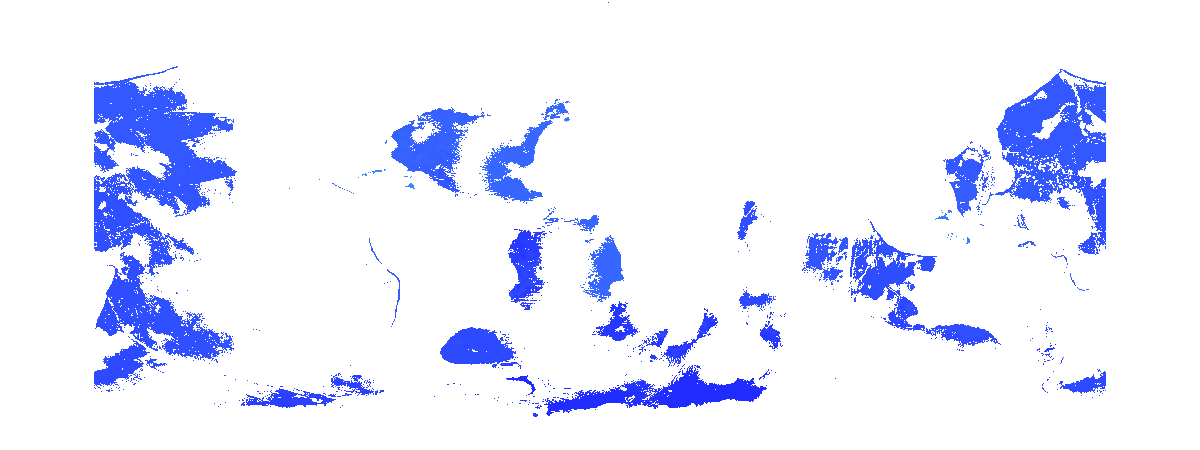

In [13]:
selected_5000 = img_lyr.filter_by(where="StdZ = -5000")#, geometry=the_geom)
selected_5000

# We have temperature at difference depths, but what about times?

# How many records are there? What times were they collected? How many depths do the cover?

In [13]:
img_sdf = img_lyr.query(return_all_records=True).df
img_sdf.head()

,Category,CenterX,CenterY,Dimensions,GroupName,HighPS,LowPS,MaxPS,MinPS,Name,OBJECTID,ProductName,Shape_Area,Shape_Length,StdTime,StdZ,Tag,Variable,ZOrder,SHAPE
0,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",374D92CB923FA36D5FC1671135624EEC,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,1,NetCDF,57628.8,1040.16,1396828800000,0,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
1,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",E3C284936B86AF1824615DA6DB8A4001,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,2,NetCDF,57628.8,1040.16,1396828800000,-2,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
2,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",AC4E2C5D9479A0C1C34B1654007F30C4,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,3,NetCDF,57628.8,1040.16,1396828800000,-4,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
3,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",7153862BAFD00BD1FF65449693A2B0E1,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,4,NetCDF,57628.8,1040.16,1396828800000,-6,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."
4,1,5.684342e-14,5.684342e-14,"StdTime, StdZ",487FF566AD8D5ACFCFB86080DFD4C9CD,0.08,0.08,2,0,hycom_glb_911_2014040700_t000_ts3z.nc:water_te...,5,NetCDF,57628.8,1040.16,1396828800000,-8,water_temp,water_temp,None,"{'rings': [[[-167.18283359999998, -80.03999999..."


## How many records are there?

In [14]:
len(img_sdf)

2760

## How many times are there?

In [15]:
time_list = img_sdf.StdTime.tolist()
times = list(set(time_list))
times.sort()
len(times)

69

## How many depths are there?

In [16]:
depth_list = img_sdf.StdZ.tolist()
depths = list(set(depth_list))
depths.sort(reverse=True)
len(depths)

40

# Depths x Times should equal the length of the dataframe

In [17]:
len(depths)*len(times)

2760

# Let's sample 4 different times at each location

In [18]:
sample_times = times[0::18]
sample_times.sort()

# Let's use *Identify* to sample the pixel values

In [124]:
temperatures = {}
for loc_idx,location in enumerate(locations):
    temperatures[loc_idx] = {}
    for t_idx, t in enumerate(sample_times):
        temperatures[loc_idx][t]={}
        val_list = []
        for idx,depth in enumerate(depths):
            selected = img_lyr.filter_by(where="StdZ = "+str(depth))
            pixel = selected.identify(geometry=location, time_extent=t)

            try:
                pix = float(pixel['value'])
                val_list.append(pix)
                temperatures[loc_idx][t]=val_list
            except:
                print("NoData")

0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
-5000
0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
-5000
0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
-5000
0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
-5000
0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-100
-125
-150
-200
-250
-300
-350
-400
-500
-600
-700
-800
-900
-1000
-1250
-1500
-2000
-2500
-3000
-4000
NoData
-5000
NoData
0
-2
-4
-6
-8
-10
-12
-15
-20
-25
-30
-35
-40
-45
-50
-60
-70
-80
-90
-

## Save the results as a picke file so I don't have to requery everything for a demo

In [125]:
import pickle
profile_pickle = open("temperature_dict.p","wb")
pickle.dump(temperatures, profile_pickle)
profile_pickle.close()

## Save the results as a picke file so I don't have to requery everything for a demo

In [1]:
import pickle
temperatures = pickle.load(open("temperature_dict.p","rb"))

# What dates am I sampling

In [28]:
from datetime import datetime

js = []
for key in temperatures[0]:
    print(datetime.fromtimestamp(key/1000).strftime("%m/%d/%Y"))
    js.append(key)
    
dts = [datetime.fromtimestamp(j/1000).strftime("%m/%d/%Y") for j in js]

04/06/2014
04/27/2014
05/20/2014
06/14/2014


# Let's visualize the results as a series of subplots

# Let's set the plot parameters

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
#sns.set_context("paper")
#sns.set_context("talk")

# Let's show the temperature profiles

1396828800000
1398643200000
1400630400000
1402790400000


<Figure size 1152x1152 with 0 Axes>

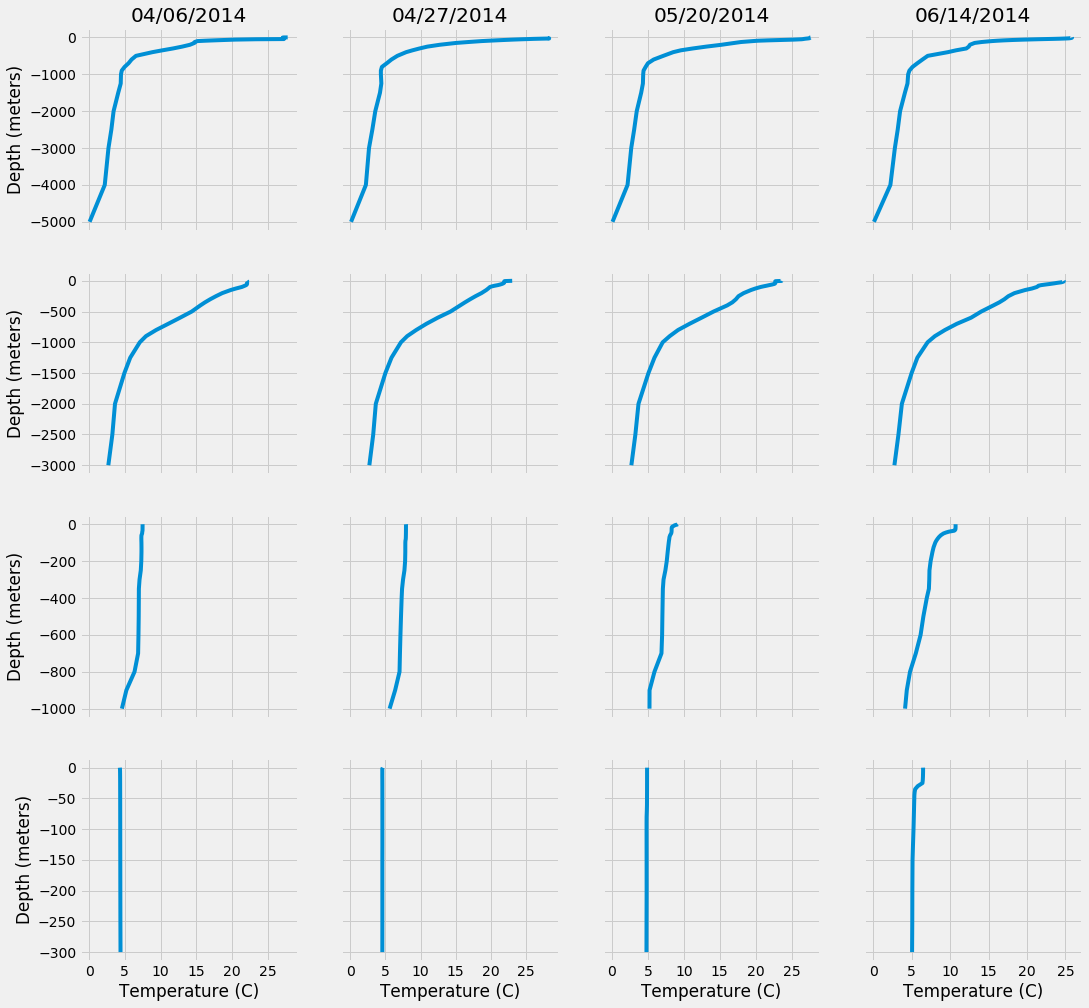

In [30]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')

fig, ax = plt.subplots(4, 4, sharex='col', sharey='row')
fig.set_figheight(16)
fig.set_figwidth(16)

for i in range(4):
    for j in range(4):
        ax[i, j].plot(temperatures[i][js[j]],depths[:len(temperatures[i][js[j]])])#,  "*b",label='linear') 
        if i == 0:
            print(js[j])
            plt.setp(ax[i, j],title=dts[j])
        if i == 3:
            plt.setp(ax[i, j], 
                 xticks=[0,5,10,15,20,25],
                 xlabel = "Temperature (C)")
        if j == 0:
            plt.setp(ax[i, j],
                 ylabel = "Depth (meters)")

In [31]:
        #plt.setp(ax[i, j], 
        #         title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
        #         xticks=[0,5,10,15,20,25],
        #         xlabel = "Temperature (C)",
        #         ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

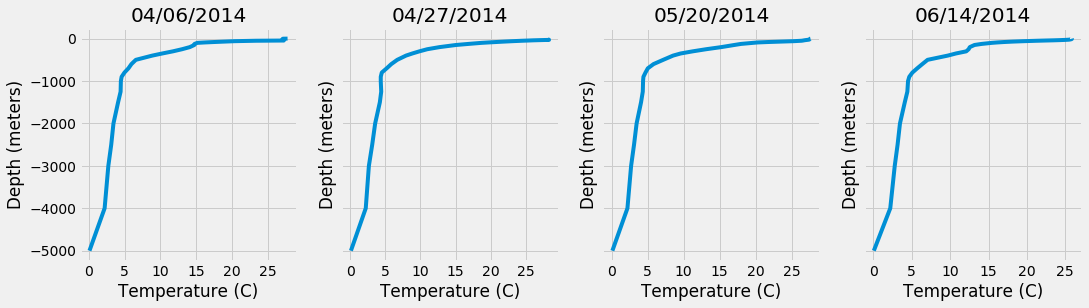

In [32]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[0][js[j]],depths[:len(temperatures[0][js[j]])])
    plt.setp(ax[j], title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

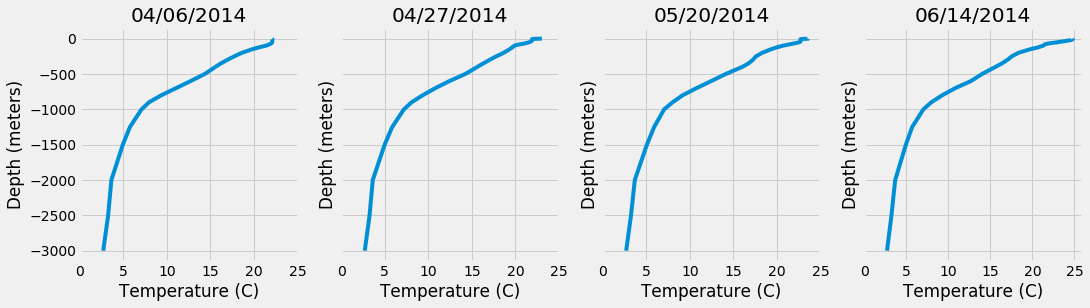

In [33]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[1][js[j]],depths[:len(temperatures[1][js[j]])])
    plt.setp(ax[j], title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

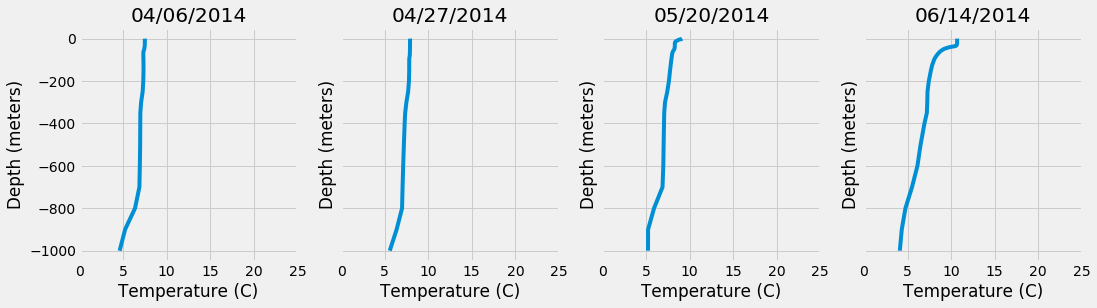

In [34]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[2][js[j]],depths[:len(temperatures[2][js[j]])])
    plt.setp(ax[j], title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

<Figure size 1152x1152 with 0 Axes>

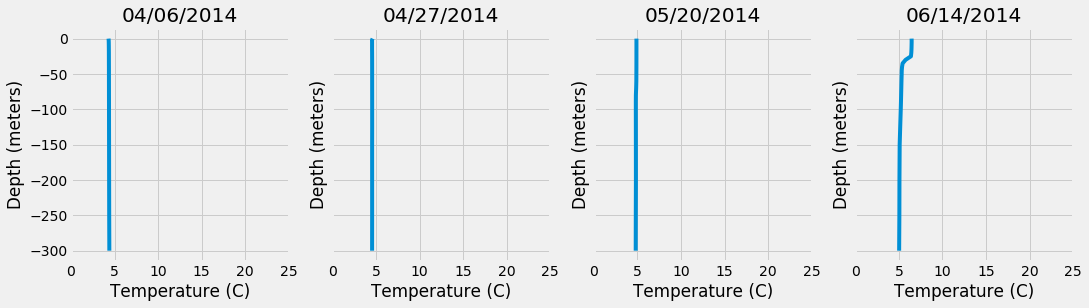

In [35]:
plt.figure(figsize=(12, 12), dpi= 96, facecolor='w', edgecolor='k')
fig, ax = plt.subplots(1, 4, sharex='col', sharey='row')
fig.set_figheight(4)
fig.set_figwidth(16)
for j in range(4):
    ax[j].plot(temperatures[3][js[j]],depths[:len(temperatures[3][js[j]])])
    plt.setp(ax[j], title=datetime.fromtimestamp(js[j]/1000).strftime("%m/%d/%Y"),
             xticks=[0,5,10,15,20,25],xlabel = "Temperature (C)", ylabel = "Depth (meters)")

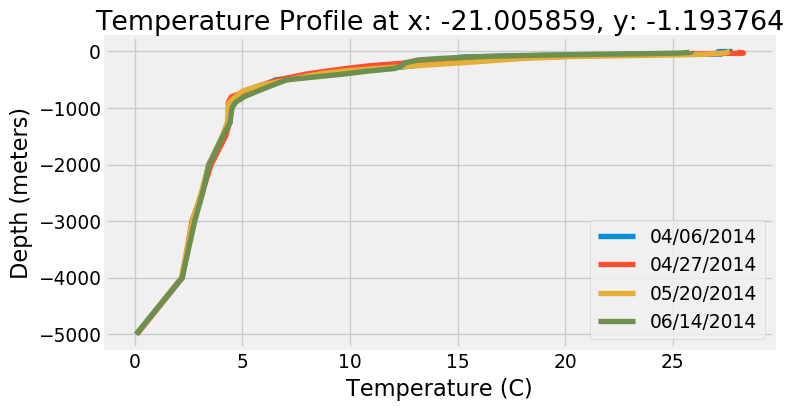

In [47]:
plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[0][js[j]],depths[:len(temperatures[0][js[j]])])
plt.xlabel("Temperature (C)");
plt.ylabel("Depth (meters)");
plt.title('Temperature Profile at x: -21.005859, y: -1.193764');
plt.legend(dts)

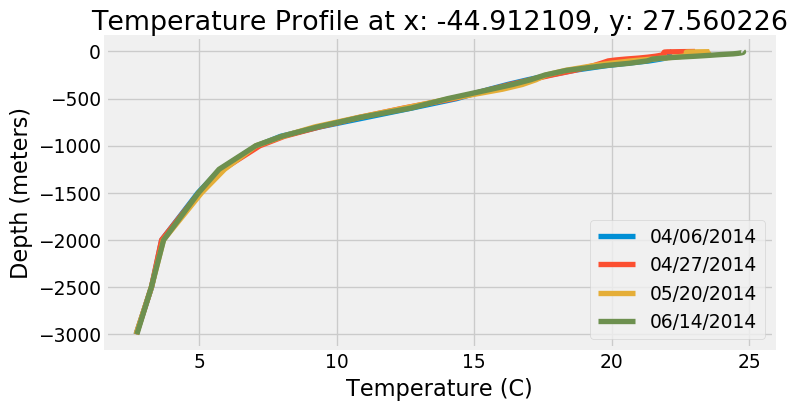

In [48]:
plt.figure(figsize=(8,4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[1][js[j]],depths[:len(temperatures[1][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: -44.912109, y: 27.560226')
plt.legend(dts)

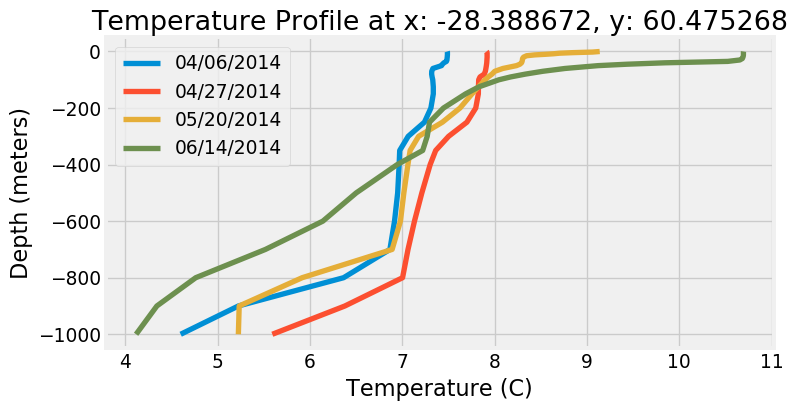

In [49]:
plt.figure(figsize=(8, 4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[2][js[j]],depths[:len(temperatures[2][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: -28.388672, y: 60.475268')
plt.legend(dts)

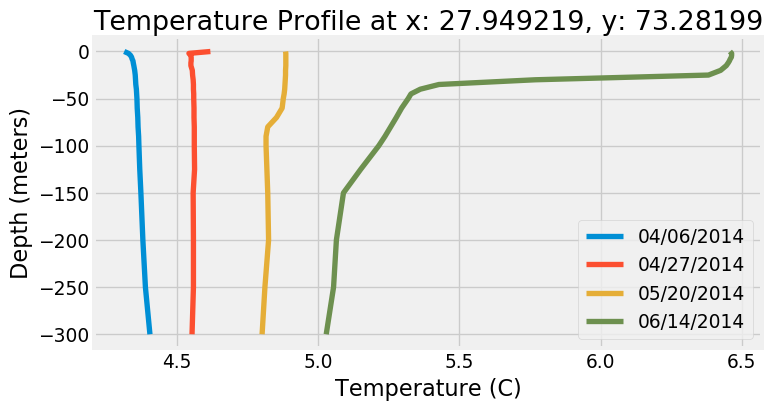

In [50]:
plt.figure(figsize=(8, 4), dpi= 96, facecolor='w', edgecolor='k')
for j in range(4):
    plt.plot(temperatures[3][js[j]],depths[:len(temperatures[3][js[j]])])
plt.xlabel("Temperature (C)")
plt.ylabel("Depth (meters)")
plt.title('Temperature Profile at x: 27.949219, y: 73.28199')
plt.legend(dts)